In [1]:
#hide
import sys
sys.path.append('..')
import pandas as pd
%load_ext autoreload
%autoreload 2

# Fastseq

> A way to use fastai with sequence data

## Installing

Please install [fastai](https://dev.fast.ai/#Installing) according to the instructions.

Then install Fastseq by:

```
git clone https://github.com/takotab/fastseq.git
cd fastseq
pip install -e .
```

If you have tried it, please let me know. Even if you got stuck and werent able to install. You can send me an [email](mailto:TakoTabak+fastseq@gmail.com), leave a comment in the (excelent) [fastai timeseries forum](https://forums.fast.ai/t/time-series-sequential-data-study-group/29686), or make an issue in [github](https://github.com/takotab/fastseq/issues). I would love to know what you think of libary any tips or comments. Do you work on these kind of data, would want more explanation of the model, would you like to see the approuch on multivariate ts. Where do think I should go with this.

Thank you

## How to use

In [2]:
from fastai.basics import *
from fastseq.all import *
from fastseq.nbeats.model import *
from fastseq.nbeats.learner import *
from fastseq.nbeats.callbacks import *

AttributeError: 'str' object has no attribute '__stored_args__'

In [ ]:
horizon, lookback = 7, 35    

Getting the data fastai style:

In [ ]:
path = untar_data(URLs.m4_daily)
data = TSDataLoaders.from_folder(path, horizon = horizon, lookback = lookback, nrows = 300, step=3)

torch.Size([1, 1020])
Train:70707; Valid: 1200; Test 300


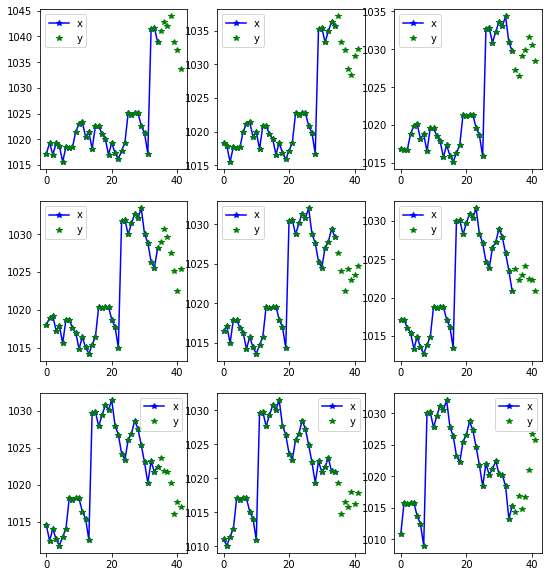

In [ ]:
data.show_batch()

In [ ]:
learn = nbeats_learner(data, season = lookback+horizon)   

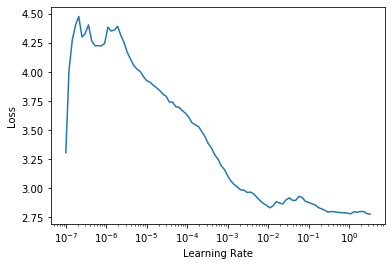

In [ ]:
from fastai.callback.all import *
learn.lr_find()

epoch,train_loss,valid_loss,mae,smape,theta,b_loss,f_loss,f_smape,time
0,1.608365,1.429745,0.468662,0.756240,2.085228,nan,nan,0.103745,01:26
1,1.543519,1.398041,0.449884,0.728823,2.033593,nan,nan,0.104480,01:25
2,1.557428,1.470988,0.467814,0.739414,1.833764,nan,nan,0.108116,01:26
3,1.507902,1.488569,0.459715,0.723740,1.953411,nan,nan,0.104374,01:28
4,1.425810,1.338848,0.421528,0.684144,1.802997,nan,nan,0.099711,01:32


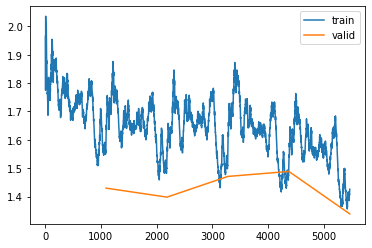

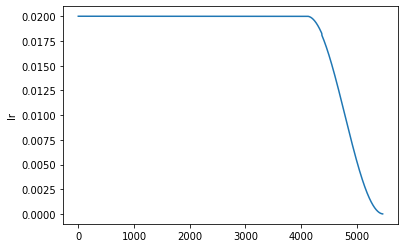

In [ ]:
learn.fit_flat_cos(5, 2e-2)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

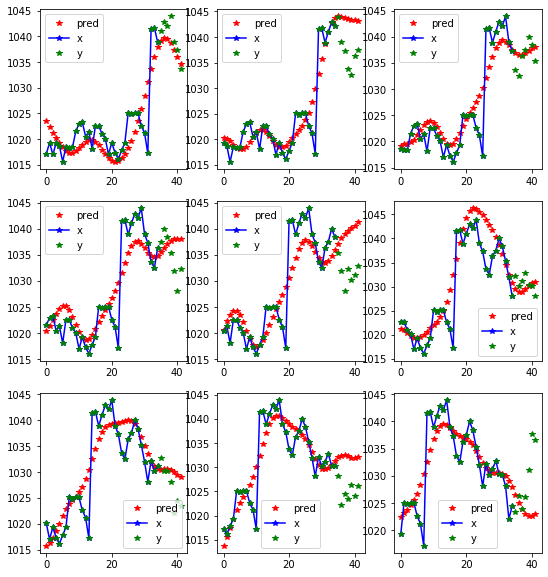

In [ ]:
learn.show_results(0)

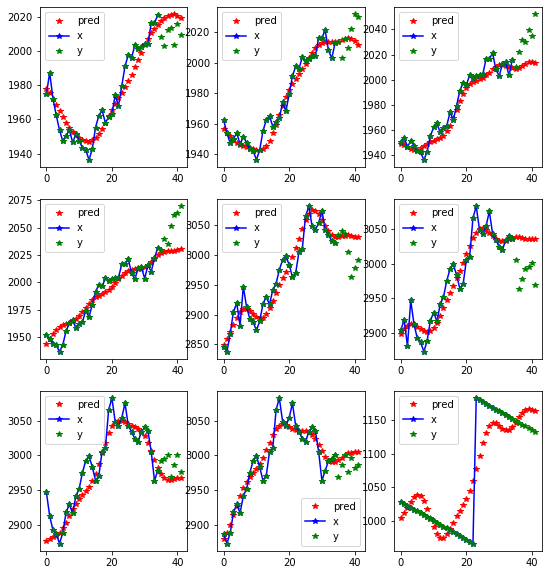

In [ ]:
learn.show_results(1)

epoch,train_loss,valid_loss,mae,smape,theta,b_loss,f_loss,f_smape,time
0,1.424263,1.343198,0.420948,0.683976,1.796664,nan,nan,0.100251,01:28


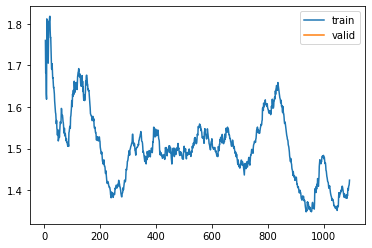

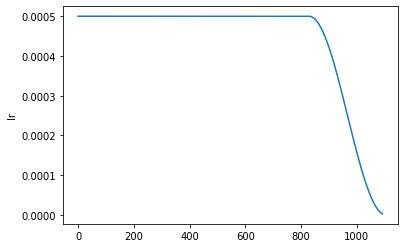

In [ ]:
learn.fit_flat_cos(1,5e-4)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

## Interperation

In [ ]:
learn.n_beats_attention.means()

,trend0_0,trend0_1,seasonality1_0,seasonality1_1,seasonality1_2,seasonality1_3
theta_0_mean,0.084346004,-0.15566854,0.33333334,0.0,0.10788739,-0.8549633
theta_0_std,0.9808921,1.0191917,0.40388188,0.0,0.17689645,0.5912291
theta_1_mean,0.002812498,-0.00619044,0.083333336,0.18620752,-0.05470855,-0.26863918
theta_1_std,0.03269631,0.035362627,0.10097047,0.23295449,0.4260137,0.22262059
theta_2_mean,-0.0012419696,0.0013037563,0.015625,-0.125,0.033530425,-0.013941522
theta_2_std,0.002147075,0.0010560098,0.061155755,0.21879749,0.06385607,0.1387485
theta_3_mean,-0.005537528,6.2500553e-06,NaN,0.30989584,-0.052088413,-0.3953999
theta_3_std,0.024471516,1.6711083e-05,NaN,0.25557557,0.18564244,0.502909
theta_4_mean,0.37125885,-0.0177321,NaN,NaN,-0.0139180375,-0.16807629
theta_4_std,0.81073123,0.077905715,NaN,NaN,0.060866524,0.21030271


In [ ]:
# hide
from fastai.interpret import *
from fastseq.nbeats.interpret import *

In [ ]:
interp = NBeatsInterpretation.from_learner(learn)

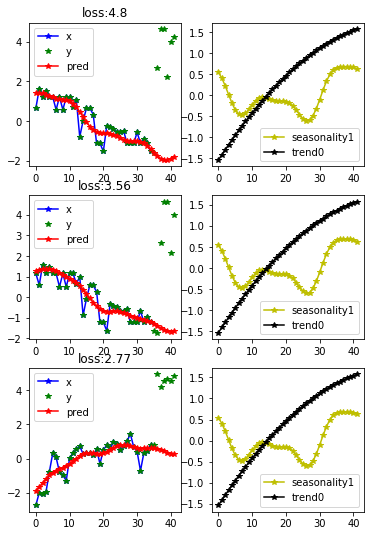

In [ ]:
interp.plot_top_losses(3, combine_stack=True)